In [1]:
import nilmtk
%matplotlib inline

In [2]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)

###### Importando a base de dados

In [3]:
# from nilmtk.dataset_converters import convert_redd
# convert_redd('REDD/low_freq', './data/redd_h.h5')

In [3]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

#hb = DataSet('./data/convert_ar_lav.h5')
# hb = DataSet('./data/teste17.h5')
hb = DataSet('./data/convert_micro_vent.h5')

print_dict(hb.metadata)

In [4]:
print_dict(hb.buildings)

In [5]:
print_dict(hb.buildings[1].metadata)

In [6]:
elec = hb.buildings[1].elec
elec
elec.mains().power_series_all_data().head()

2021-09-02 07:14:34.515000-03:00    167.199997
2021-09-02 07:14:35.014000-03:00    167.199997
2021-09-02 07:14:35.513000-03:00    167.199997
2021-09-02 07:14:36.013000-03:00    167.199997
2021-09-02 07:14:36.527000-03:00    166.899994
Name: (power, active), dtype: float32

In [25]:
from nilm_metadata import get_appliance_types
#ElecMeter metadata
print(elec['washer dryer'].metadata) # ElecMeter metadata
print(elec['washer dryer'].device) # MeterDevice metadata
print(elec['washer dryer'].dominant_appliance().metadata) # metadata for the Appliance
print(elec['washer dryer'].dominant_appliance().type) # 'central metadata' for the appliance
# get_appliance_types()

{'submeter_of': 1, 'device_model': 'eMonitor', 'data_location': '/building1/elec/meter2'}
{'model': 'sonoff', 'manufacturer': 'Powerhouse Dynamics', 'manufacturer_url': 'http://powerhousedynamics.com', 'description': '...\n', 'sample_period': 5, 'max_sample_period': 30, 'measurements': [{'physical_quantity': 'power', 'type': 'active', 'upper_limit': 1142, 'lower_limit': 0}, {'physical_quantity': 'power', 'type': 'apparent', 'upper_limit': 1215, 'lower_limit': 0}, {'physical_quantity': 'power', 'type': 'reactive', 'upper_limit': 901, 'lower_limit': 0}, {'physical_quantity': 'power factor', 'upper_limit': 1, 'lower_limit': 0}, {'physical_quantity': 'voltage', 'upper_limit': 232, 'lower_limit': 0}, {'physical_quantity': 'current', 'upper_limit': 6, 'lower_limit': 0}], 'wireless': True}
{'original_name': 'washer dryer', 'type': 'washer dryer', 'instance': 1, 'meters': [2], 'dataset': 'HB', 'building': 1}
{'parent': 'washing machine', 'min_on_duration': 600, 'min_off_duration': 300, 'type':

In [8]:
# washer_dryer = elec['washer dryer']
# air_conditioner = elec['air conditioner']
# washer_dryer.available_columns()

microwave = elec['microwave']
fan = elec['fan']
# washer_dryer.available_columns()

In [59]:
from nilmtk.elecmeter import ElecMeterID##### Quadro Geral

meter1 = elec[ElecMeterID(instance=1, building=1, dataset='HB')]

next(meter1.load()).head()


physical_quantity,frequency,power,current,voltage,power factor
type,,active,,,
2021-09-02 07:14:34.515000-03:00,60.0,167.199997,0.896,221.600006,0.84
2021-09-02 07:14:35.014000-03:00,60.0,167.199997,0.896,221.600006,0.84
2021-09-02 07:14:35.513000-03:00,60.0,167.199997,0.896,221.600006,0.84
2021-09-02 07:14:36.013000-03:00,60.0,167.199997,0.896,221.600006,0.84
2021-09-02 07:14:36.527000-03:00,60.0,166.899994,0.890,221.500000,0.85


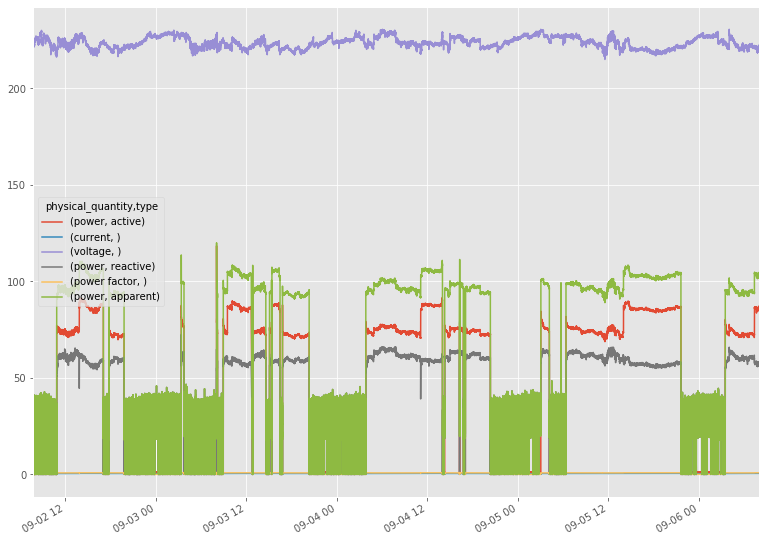

In [69]:
df = next(fan.load())
#df = next(fridge.load(physical_quantity='power', ac_type='reactive'))
#df = next(washer_dryer.load(physical_quantity='voltage'))
# df = next(fridge.load(physical_quantity = 'power'))
# df = next(fridge.load(ac_type='active'))
# df = next(fridge.load(ac_type='active', sample_period=60)) # resample to minutely (i.e. with a sample period of 60 secs)
df.plot()

In [ ]:
elec.mains().total_energy() # returns kWh

In [ ]:
 elec.submeters().energy_per_meter()

In [ ]:
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

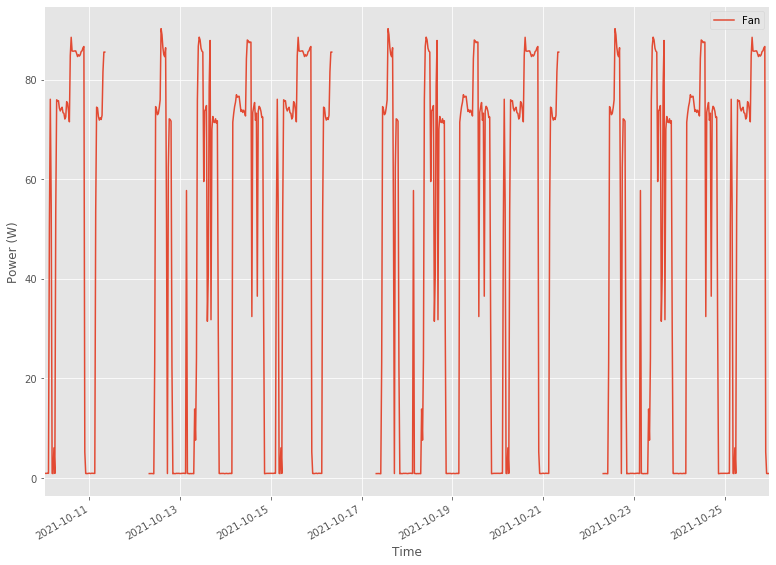

In [10]:
# import matplotlib.pyplot as plt

hb.set_window(start='2021-10-10', end='2021-10-26')
#elec.plot()
#elec.mains().plot()
fan.plot()
# air_conditioner.plot()
plt.xlabel("Time");

# #plt.plot(next(fridge.load()))
# plt.plot(elec.mains().power_series_all_data())
# plt.show()


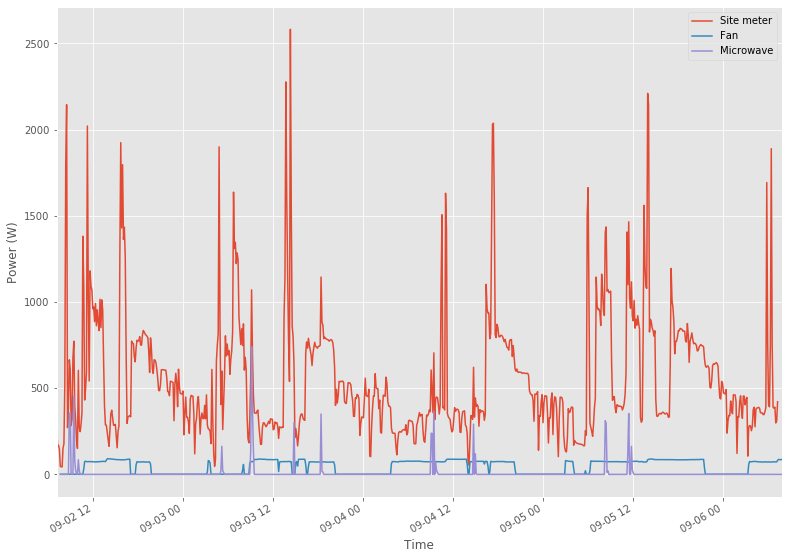

In [88]:
# import matplotlib.pyplot as plt

hb.set_window(start='2021-09-02', end='2021-09-07')
elec.plot();
#elec.mains().plot();
#fan.plot()
#air_conditioner.plot()
plt.xlabel("Time");

#plt.plot(next(washer_dryer.load()))
# plt.plot(elec.mains().power_series_all_data())
plt.show()

#04:26h	 2:45h enxague	2:11 centrifugando	1:53 secando


In [ ]:
from nilmtk.elecmeter import ElecMeterID 
meter1 = elec[ElecMeterID(instance=0, building=1, dataset='REDD')]

redd.set_window(start='2011-04-21', end='2011-04-22')
meter1.plot()
plt.xlabel("Time");

In [ ]:
from nilmtk.elecmeter import ElecMeterID 
meter1 = elec[ElecMeterID(instance=0, building=1, dataset='REDD')]

redd.set_window(start='2011-04-21', end='2011-04-22')

meter1.plot()
elec['fridge'].plot()
plt.xlabel("Time");

In [ ]:
from nilmtk.elecmeter import ElecMeterID 
meter1 = elec[ElecMeterID(instance=0, building=1, dataset='REDD')]

redd.set_window(start='2011-04-21 10:00:00', end='2011-04-21 14:00:00')
meter1.plot()
elec['fridge'].plot()
plt.xlabel("Time");

In [ ]:
elec.nested_metergroups()

In [ ]:
elec.mains()

In [ ]:
elec.mains().power_series_all_data().head()

In [ ]:
elec.submeters()

In [ ]:
elec.proportion_of_energy_submetered()

In [ ]:
mains = elec.mains()

In [ ]:
mains.available_ac_types('power')

In [ ]:
elec.submeters().available_ac_types('power')

In [ ]:
next(elec.load())